In [6]:

# A1 - Neural Networks and Regression (Testing Implementations)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Import your three implementations
from NeuralNet import NeuralNet                   # BP-M (from scratch)
from neuralnet_torch import NeuralNetTorch        # BP-F (PyTorch)
from mlr_sklearn import MultipleLinearRegressionSK  # MLR-F (scikit-learn)

In [2]:
#Dataset Base

# XOR dataset (non-linear) for BP
X_xor = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
Z_xor = np.array([[0],[1],[1],[0]], dtype=np.float32)

# Linear dataset - for Regression
X_lin = np.array([
    [1.0, 2.0],
    [2.0, 0.0],
    [3.0, 1.0],
    [4.0, 3.0],
    [5.0, 5.0],
], dtype=np.float64)

Z_lin = 2 * X_lin[:, 0] + 0.5 * X_lin[:, 1] + 1.0


In [ ]:
# Load dataset from file 
hours = pd.read_csv('hours_encoded.csv')

# Remove cnt column, as we'll be using cnt_log for regression
# Don't need full date either
hours = hours.drop(columns=["cnt", "dteday"])

# Shuffle data as per instructions, and pick up only first 1500 samples
hours = hours.sample(n=1500, random_state=42).reset_index(drop=True)

X = hours.drop(columns=["cnt_log"])
y = hours["cnt_log"]

# TODO: do we need to scale the data?
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)  

X_train, X_test, y_train, y_test = train_test_split(X, y)

# test
X_xor = X_train.values
Z_xor = y_train.values

Neural network has been initialized
Architecture (neurons per layer): [61, 35, 1]
Activation function used: sigmoid
 Layer 1: w(35, 61), theta(35, 1)
 Layer 2: w(1, 35), theta(1, 1)
Epoch 0: Train MSE=7.226417


/Volumes/SST2/Dev/gh/nec-activity1/NeuralNet.py:114: RuntimeWarning: overflow encountered in exp
  def sigmoid_derivative(self, x):
/Volumes/SST2/Dev/gh/nec-activity1/NeuralNet.py:115: RuntimeWarning: overflow encountered in exp
  """Derivative of sigmoid"""
/Volumes/SST2/Dev/gh/nec-activity1/NeuralNet.py:115: RuntimeWarning: invalid value encountered in divide
  """Derivative of sigmoid"""


Epoch 100: Train MSE=7.215593
Epoch 200: Train MSE=7.215590

Predictions BP-M (from scratch):
Input [ 0.      1.      0.34    0.303   0.25    0.3881 18.     63.      0.
  1.      0.      0.      1.      0.      0.      0.      1.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      1.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      1.      0.
  0.      0.      0.      0.      1.      0.      0.    ] -> Predicted output: 1.0000
Input [ 0.      1.      0.28    0.2879  0.61    0.1343  8.     60.      1.
  0.      0.      0.      1.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      1.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      1.      0.      0.      0.     

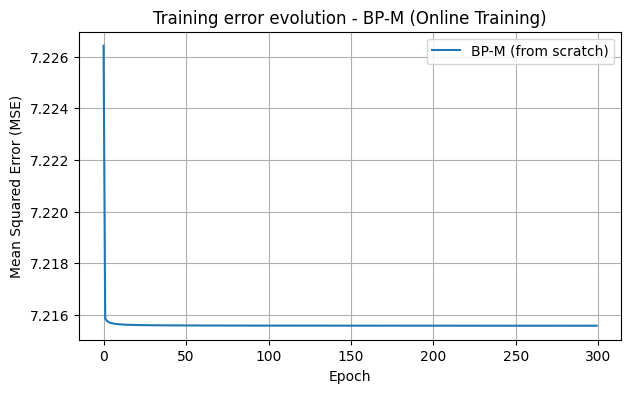

In [13]:

# Test 1: Neural Network - BP (from scratch)



# Create the manual neural network using the same parameters as in the assignment
net_manual = NeuralNet(
    [61, 35, 1],
    fact='sigmoid',
    eta=0.01,
    alpha=0.9,
    epochs=300,
    val_split=0.0
)

# Training phase (each pattern is processed individually - online mode)
net_manual.fit(X_xor, Z_xor)

# Retrieve training errors per epoch
train_err_manual, _ = net_manual.loss_epochs()


# Predictions

# Evaluate one sample at a time (online mode)
pred_manual = np.array([net_manual.predict(x) for x in X_xor])

print("\nPredictions BP-M (from scratch):")
for i, (inp, pred) in enumerate(zip(X_xor, pred_manual)):
    print(f"Input {inp} -> Predicted output: {pred.ravel()[0]:.4f}")


# Training error plot

plt.figure(figsize=(7, 4))
plt.plot(train_err_manual, label="BP-M (from scratch)", color="tab:blue")
plt.title("Training error evolution - BP-M (Online Training)")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.legend()
plt.show()

Neural network (PyTorch) has been initialized
Architecture (neurons per layer): [61, 35, 1]
Activation function used: sigmoid
Epoch 0: Train MSE=20.408478
Epoch 100: Train MSE=1.931261
Epoch 200: Train MSE=1.930069
Epoch 300: Train MSE=1.929460


/Volumes/SST2/Dev/gh/nec-activity1/venv/lib/python3.11/site-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([1125])) that is different to the input size (torch.Size([1125, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 400: Train MSE=1.929088
Epoch 500: Train MSE=1.928837
Epoch 600: Train MSE=1.928657
Epoch 700: Train MSE=1.928523
Epoch 800: Train MSE=1.928421
Epoch 900: Train MSE=1.928341

Predictions BP-F (PyTorch):
Input [ 0.      1.      0.34    0.303   0.25    0.3881 18.     63.      0.
  1.      0.      0.      1.      0.      0.      0.      1.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      1.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      1.      0.
  0.      0.      0.      0.      1.      0.      0.    ] -> Predicted output: 4.5349
Input [ 0.      1.      0.28    0.2879  0.61    0.1343  8.     60.      1.
  0.      0.      0.      1.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      1.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0

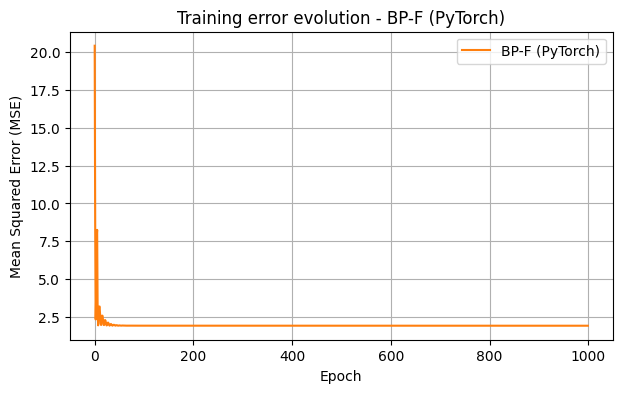

In [14]:

# Test 2: Neural Network - BP (PyTorch)


# Create the PyTorch neural network (same architecture and parameters)
net_torch = NeuralNetTorch(
    [61, 35, 1],
    fact='sigmoid',
    eta=0.01,
    alpha=0.9,
    epochs=1000,
    val_split=0.0
)

# Train the network
net_torch.fit(X_xor, Z_xor)

# Retrieve training errors
train_err_torch, _ = net_torch.loss_epochs()


# Predictions

pred_torch = net_torch.predict(X_xor)

print("\nPredictions BP-F (PyTorch):")
for i, (inp, pred) in enumerate(zip(X_xor, pred_torch)):
    print(f"Input {inp} -> Predicted output: {pred.ravel()[0]:.4f}")


# Training error plot

plt.figure(figsize=(7, 4))
plt.plot(train_err_torch, label="BP-F (PyTorch)", color="tab:orange")
plt.title("Training error evolution - BP-F (PyTorch)")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.legend()
plt.show()

MLR (scikit-learn) fitted
 - Train MSE: 0.213811 | Train R^2: 0.892477
 -  Val  MSE: 0.194315 |  Val  R^2: 0.883697

Predictions MLR-F (scikit-learn):
Sample 0: Predicted cnt_log = 5.6381, Real cnt_log = 5.4931
Sample 1: Predicted cnt_log = 3.6734, Real cnt_log = 2.7081
Sample 2: Predicted cnt_log = 2.0023, Real cnt_log = 1.7918
Sample 3: Predicted cnt_log = 6.4439, Real cnt_log = 6.3244
Sample 4: Predicted cnt_log = 4.2916, Real cnt_log = 4.0073
Sample 5: Predicted cnt_log = 2.5128, Real cnt_log = 1.3863
Sample 6: Predicted cnt_log = 4.2721, Real cnt_log = 3.9703
Sample 7: Predicted cnt_log = 6.2738, Real cnt_log = 6.2934
Sample 8: Predicted cnt_log = 5.1329, Real cnt_log = 5.1299
Sample 9: Predicted cnt_log = 4.5119, Real cnt_log = 5.1648
Sample 10: Predicted cnt_log = 2.7915, Real cnt_log = 2.7081
Sample 11: Predicted cnt_log = 5.7114, Real cnt_log = 5.7526
Sample 12: Predicted cnt_log = 5.5184, Real cnt_log = 5.9454
Sample 13: Predicted cnt_log = 3.6298, Real cnt_log = 3.8067
Sampl

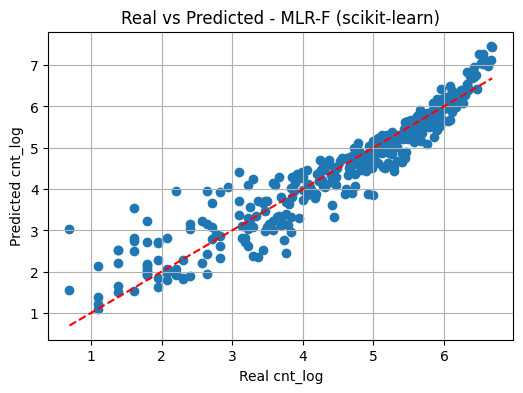

In [15]:

# Test 3: Multiple Linear Regression - MLR (scikit-learn)

# Create the regression model with 20% validation
mlr = MultipleLinearRegressionSK(val_split=0.2, scale=False)

# Train the model
mlr.fit(X_train.values, y_train.values)

# Predictions
y_pred = mlr.predict(X_test.values) 

print("\nPredictions MLR-F (scikit-learn):")
for i, (inp, pred, real) in enumerate(zip(X_test.values, y_pred, y_test.values)):
    print(f"Sample {i}: Predicted cnt_log = {pred:.4f}, Real cnt_log = {real:.4f}")

# Print learned coefficients
print("\nLearned coefficients:")
print("Coef:", mlr.coef_)
print("Intercept:", mlr.intercept_)

# Plot real vs predicted
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], "r--")
plt.title("Real vs Predicted - MLR-F (scikit-learn)")
plt.xlabel("Real cnt_log")
plt.ylabel("Predicted cnt_log")
plt.grid(True)
plt.show()

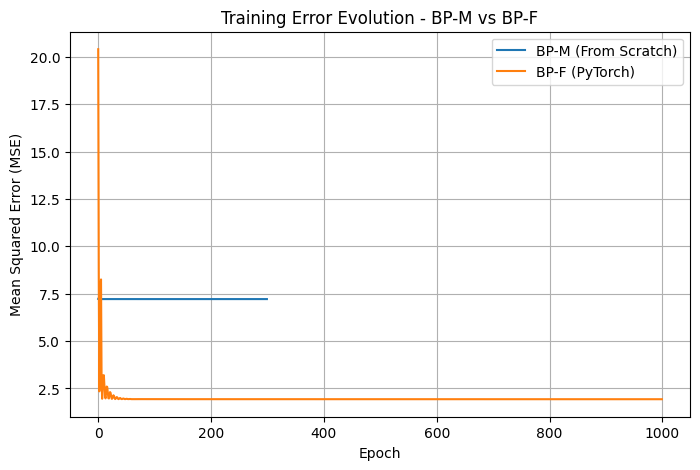

In [16]:

# Ccomparison between BP from Scratch and BP Pytorch


plt.figure(figsize=(8, 5))
plt.plot(train_err_manual, label="BP-M (From Scratch)", color="tab:blue")
plt.plot(train_err_torch, label="BP-F (PyTorch)", color="tab:orange")
plt.title("Training Error Evolution - BP-M vs BP-F")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid(True)
plt.show()